In [9]:
import pandas as pd
from sklearn.model_selection import ShuffleSplit

In [10]:
data = pd.read_csv('data/aug_train.csv')

In [11]:
data

,enrollee_id,city,city_development_index,gender,relevent_experience,enrolled_university,education_level,major_discipline,experience,company_size,company_type,last_new_job,training_hours,target
0,8949,city_103,0.920,Male,Has relevent experience,no_enrollment,Graduate,STEM,>20,NaN,NaN,1,36,1.0
1,29725,city_40,0.776,Male,No relevent experience,no_enrollment,Graduate,STEM,15,50-99,Pvt Ltd,>4,47,0.0
2,11561,city_21,0.624,NaN,No relevent experience,Full time course,Graduate,STEM,5,NaN,NaN,never,83,0.0
3,33241,city_115,0.789,NaN,No relevent experience,NaN,Graduate,Business Degree,<1,NaN,Pvt Ltd,never,52,1.0
4,666,city_162,0.767,Male,Has relevent experience,no_enrollment,Masters,STEM,>20,50-99,Funded Startup,4,8,0.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
19153,7386,city_173,0.878,Male,No relevent experience,no_enrollment,Graduate,Humanities,14,NaN,NaN,1,42,1.0
19154,31398,city_103,0.920,Male,Has relevent experience,no_enrollment,Graduate,STEM,14,NaN,NaN,4,52,1.0
19155,24576,city_103,0.920,Male,Has relevent experience,no_enrollment,Graduate,STEM,>20,50-99,Pvt Ltd,4,44,0.0
19156,5756,city_65,0.802,Male,Has relevent experience,no_enrollment,High School,NaN,<1,500-999,Pvt Ltd,2,97,0.0


In [12]:
corr_matrix = data.corr()
corr_matrix["target"].sort_values(ascending =False)

target                    1.000000
enrollee_id               0.049475
training_hours           -0.021577
city_development_index   -0.341665
Name: target, dtype: float64

In [13]:
# data["city_development_index_cat"] = pd.cut(data["city_development_index"], bins = [0,0.5,0.6,0.7,0.8,0.9,0.95,1.0], labels = [1,2,3,4,5,6,7])

In [14]:
# data["city_development_index_cat"].hist()

<AxesSubplot:>

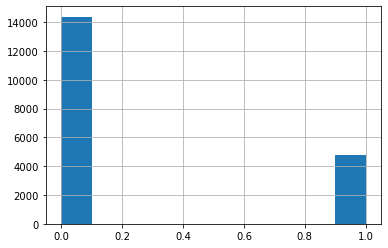

In [15]:
data["target"].hist()

In [16]:
from sklearn.model_selection import StratifiedShuffleSplit

split = StratifiedShuffleSplit(n_splits =1, test_size =0.2, random_state = 42)
for train_cv_index, test_index in split.split(data, data["target"]):
  strat_train_cv_set = data.loc[train_cv_index]
  strat_test_set = data.loc[test_index]

In [17]:
cvsplit = StratifiedShuffleSplit(n_splits =1, test_size =0.25, random_state = 42)
for train_index, cv_index in cvsplit.split(strat_train_cv_set, strat_train_cv_set["target"]):
  strat_train_set = data.loc[train_index]
  strat_cv_set = data.loc[cv_index]

In [18]:
print(len(strat_train_cv_set),len(strat_train_set),len(strat_cv_set), len(strat_test_set))

15326 11494 3832 3832


In [20]:
strat_train_set.shape

(11494, 14)

In [21]:
strat_cv_set.shape

(3832, 14)

In [22]:
strat_test_set.shape

(3832, 14)

In [23]:
strat_train_set.to_csv('Data/strat_train.csv', index=False)

In [24]:
strat_cv_set.to_csv('Data/strat_cv.csv', index=False)

In [25]:
strat_test_set.to_csv('Data/strat_test.csv', index=False)